#  MODEL ARCHITECTURE DESIGN 模型架构设计

A detailed schematic for the neural architectures in this study is presented in Fig. 2. The schematic
includes architectures for both the classification and regression network, which share a common encoder
architecture. The segmentation network consists of an additional decoder which features transpose
convolutions and skip layers, inspired by the U-Net architecture (Ronneberger et al., 2015).
Minor adjustments are made for different tasks, mainly surrounding adjusting the number of input
and output layers to process signals at varied resolutions. A detailed breakdown for model architectures,
as well as training details for each task in the Experiment section (Sec. 4), is provided in the
appendix (Appendix Sec. B).

本研究中神经结构的详细示意图如图2所示

该原理图包括分类和回归网络的架构，它们共享一个共同的编码器架构。

分段网络由一个额外的解码器组成，该解码器具有转置卷积和跳过层，受U-Net架构的启发（Ronneberger等，2015）。

对不同的任务进行微调，主要是围绕调整输入和输出层的数量来处理不同分辨率的信号。

附录（附录中的B部分）提供了模型体系结构的详细分类，以及实验部分（第4节）中每项任务的培训详细信息。

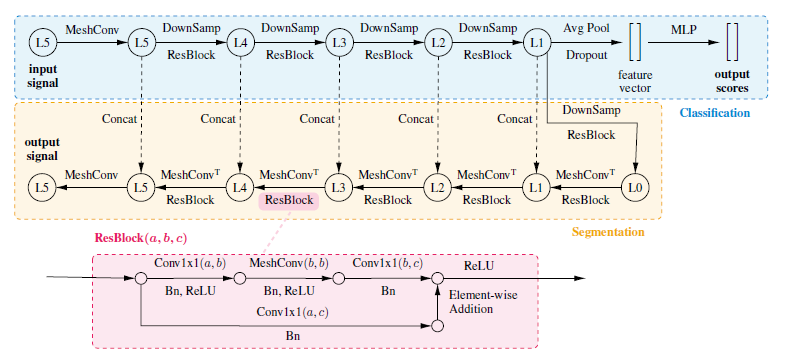
Figure 2: Schematics for model architecture for classification and semantic segmentation tasks, at a
level-5 input resolution. Ln stands for spherical mesh of level-n as defined in Sec. 3.2. MeshConv
is implemented according to Eqn. 4. MeshConvT first pads unknown values at the next level with 0,
followed by a regular MeshConv. DownSamp samples the values at the nodes in the next mesh level.
A ResBlock with bottleneck layers, consisting of Conv1x1 (1-by-1 convolutions) and MeshConv
layers is detailed above. In the decoder, ResBlock is after each MeshConvT and Concat.

用于分类和语义分段任务的模型体系结构的原理图，级别为5。

级别就是我们前面所说的二十面体网格的级数

meshconv是这么算的：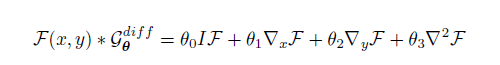

MeshConvT首先用0填充下一级的未知值，然后是常规的MeshConv。

DownSamp对下一个网格级别的节点处的值进行采样。

resblock的组成部分上面写了，是由一对一卷积和mesh层组成

我的理解： u-net和这个类似，先收缩（从L5到L1），在扩张从l1到l5，然后进行分类，这里的改动是，我encode完了就将输出分类，如果想进行回归预测的话，我们就可以decode一下

先看encoder的部分，我从L5逐渐减少顶点，到正二十面体，那么每次先downsample，取下一级的顶点，然后再进入resblock，这样我们就一层一层减，减到正二十面体的形状。同时，每一层的输出我们先保留，这个再之后的decoder部分也是有用的

encoder到L1后，可以痛殴过池化和多层感知器得到一个分类结果了

但如果我们想重构结果（或者判断某一块的性质，也就是回归），那我们可以再弄一个decoder，这样一个encoder-decoder模型就和u-net一样了，decoder的输入由上一层的输出和encoder部分对应的输入组成